In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import math

import my_lib_santanastasio as my

import rotolamento as rt

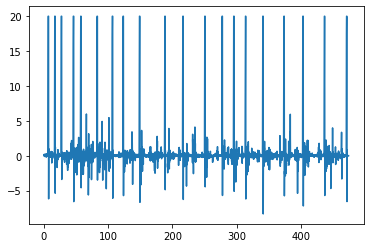

In [2]:
df = pd.read_csv('misure_2/Angolo25/RawData2.csv')

data_time = df['Time (s)'].to_numpy()
data_y = df['Gyroscope y (rad/s)'].to_numpy()

#Plot dataset
plt.plot(data_time[:],data_y[:])

In [3]:
intervals,indexes = rt.get_intervals(data_time,data_y,5,18)
intervals

[[6.224355289, 6.474525777999999],
 [16.44140536, 16.68156928],
 [26.57796168, 26.8181202],
 [45.33051284, 45.5706727],
 [56.75800231, 56.99816687],
 [82.26496809, 82.51513134],
 [106.00072809999999, 106.24088700000001],
 [122.734669, 122.97482859999998],
 [148.291861, 148.5320285],
 [187.70810269999998, 187.9582686],
 [215.7566253, 216.00679359999998],
 [249.9594759, 250.19962999999998],
 [276.8672463, 277.1174126],
 [294.9593008, 295.20947010000003],
 [313.1614997, 313.4216734],
 [340.2595935, 340.509657],
 [373.0914269, 373.33158510000004],
 [402.6211986, 402.8713503],
 [436.04348219999997, 436.2938803],
 [470.62673839999997, 470.87689800000004]]

In [4]:
#Plot dataset
#plt.plot(data_time,data_y)

# Eseguo il fit sul dataset negli intervalli
alpha_values = np.array([rt.m_from_fit(data_time,data_y,x[0],x[1]) for x in intervals ])
alpha_fit = alpha_values[:,0] #array valori attesi
salpha_fit = alpha_values[:,1] #array incertezze

In [5]:
#inferenza prior non vaga
#alpha_best = sum(alpha_fit*(1/salpha_fit**2))/sum(1/salpha_fit**2)
#salpha_best = 1/np.sqrt(sum(1/salpha_fit**2))

#oppure calcolarla con media
alpha_best = alpha_fit.mean()
salpha_best = np.std(alpha_fit,ddof=1)/np.sqrt(len(alpha_fit))

print(alpha_best)
print(salpha_best)

rt.PrintResult("Aplha",alpha_best,salpha_best,2,"[Rad/s]" )

52.96513267815391
0.07976009603035666
Aplha= 52.97 ± 0.08 [Rad/s] [0.15%]


In [6]:
dtab = pd.DataFrame(data={
    'Alpha' : alpha_fit,
    'Sigma Alpha' : salpha_fit,
})

dtab

,Alpha,Sigma Alpha
0,52.884668,0.170056
1,52.602419,0.235468
2,53.360802,0.149158
3,53.429232,0.218298
4,53.649124,0.220652
5,53.110217,0.162823
6,52.909231,0.152895
7,53.724106,0.233357
8,53.063940,0.203013
9,52.820469,0.239043


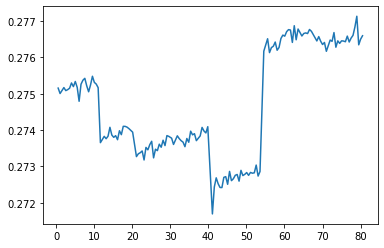

Angolo= 0.275 ± 0.0 [Rad] [0.00%]
Angolo= 15.737 ± 0.017 [Deg] [0.11%]



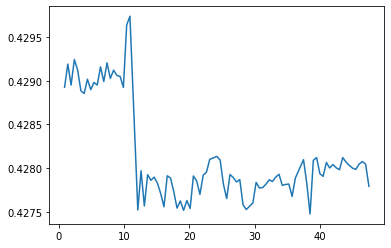

Angolo= 0.428 ± 0.0 [Rad] [0.00%]
Angolo= 24.531 ± 0.011 [Deg] [0.04%]



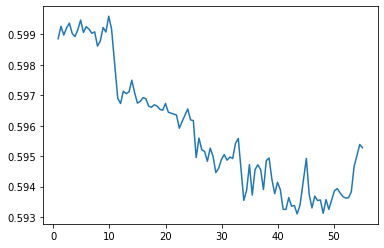

Angolo= 0.596 ± 0.0 [Rad] [0.00%]
Angolo= 34.137 ± 0.023 [Deg] [0.07%]



In [7]:
# Seconda Parte
## Misura Dell'accelerazione di gravità

# analizzo il dataset degli angoli e ne ricavo valore atteso e incertezza
angle_files = [ ['misure_2/Angolo15/plane.csv', 5],['misure_2/Angolo25/plane.csv',3], ['misure_2/Angolo35/plane.csv',5] ]

angles = np.array([ rt.get_angle_from_data(data,nmis) for data,nmis in angle_files ])

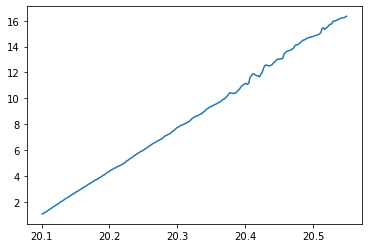

In [8]:
# analizzo dataset singola misura
# ricavo alpha e incertezza tramite fit

alphas_files = ['misure_2/Angolo15/Raw Data.csv','misure_2/Angolo35/Raw Data.csv']
intervals_2 = [ [20.1,20.55] , [6.6,6.75] ] 

#tramite questa funzione puoi trovare l'intervallo in cui analizzare il dataset
plt = rt.plot_gyro_phyphox(alphas_files[0],intervals_2[0])


(34.63953832423437, 0.074149529837678)

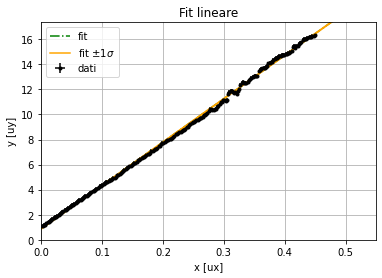

In [9]:
rt.fit_from_gyro_phyphox(alphas_files[0],intervals_2[0])

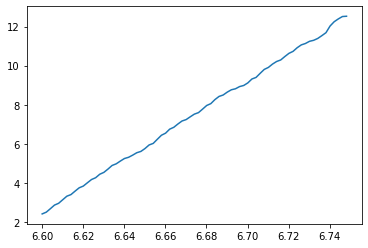

In [10]:
plt2 = rt.plot_gyro_phyphox(alphas_files[1],intervals_2[1])

(67.77851298964451, 0.2000709902384103)

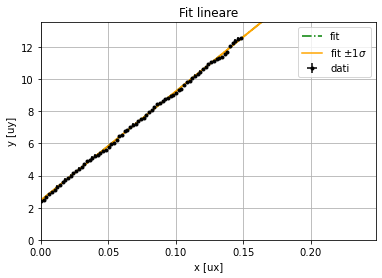

In [11]:
rt.fit_from_gyro_phyphox(alphas_files[1],intervals_2[1])

# Punto 7 - 2
## fluttuazioni relative nella misura di α per un diverso angolo del piano

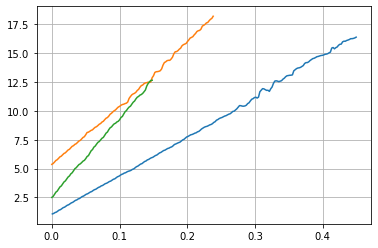

In [12]:
files = [
    pd.read_csv(alphas_files[0]),
    pd.read_csv('misure_2/Angolo25/RawData2.csv'),#file delle 10 misure
    pd.read_csv(alphas_files[1])
]

intervals_3 = [
    intervals_2[0],
    intervals[4],#un intervallo a caso delle 10 misure del primo punto
    intervals_2[1]
] 

for n in range(0,3):
    df = files[n]
    y = df['Gyroscope y (rad/s)'].to_numpy()
    x = df['Time (s)'].to_numpy()
    ind_start = rt.time_to_index(x,intervals_3[n][0])
    ind_finish = rt.time_to_index(x,intervals_3[n][1])
    plt.plot(x[ind_start:ind_finish]-intervals_3[n][0], y[ind_start:ind_finish]-y[0])

plt.grid()

In [79]:
files = [
    pd.read_csv('misure_2/Angolo15/Raw Data1.csv'),
    #pd.read_csv('misure_2/Angolo20/RawData.csv'),
    pd.read_csv('misure_2/Angolo25/RawData2.csv'),#file delle 10 misure
    #pd.read_csv('misure_2/Angolo30/Raw Data.csv'),
    pd.read_csv('misure_2/Angolo35/Raw Data.csv'),
]

aplha_angle = [] 
aplha_mean = []



for f in files:
    y = f['Gyroscope y (rad/s)'].to_numpy()
    x = f['Time (s)'].to_numpy()
    
    intervals,indexes = rt.get_intervals(x,y,5,18)
    aplha_angle.append(np.array([rt.m_from_fit(x,y,n[0],n[1]) for n in intervals]))

Text(0, 0.5, '$\\omega$ [rad/s]')

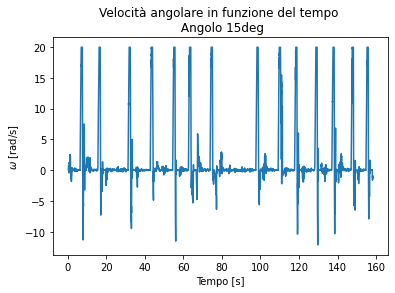

In [80]:
df = files[0]
y = df['Gyroscope y (rad/s)'].to_numpy()
x = df['Time (s)'].to_numpy()



def plotGyro(x,y,gradi):
    plt.plot(x,y)
    plt.title("Velocità angolare in funzione del tempo \n Angolo {}deg")
    plt.xlabel("Tempo [s]")
    plt.ylabel("$\omega$ [rad/s]")
    

[35.54944185 34.4212235  34.33292983 35.25496581 34.84597927 34.23391145
 35.54148395 36.01018365 34.83869157 32.55421157 35.80083704 34.15611321
 34.97956108 36.05168345]
3.497471880205829


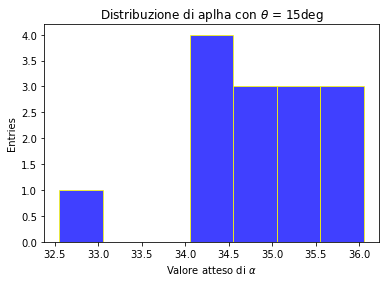

In [96]:
def plotSimpleHist(data,gradi):
    
    binsize = np.std( data, ddof=1 )/2
    t_min = data.min()
    t_max = data.max()
    interval = t_max - t_min
    nbins = int(interval / binsize)

    counts , bins , patches = plt.hist(data, bins=nbins, color="blue", edgecolor="yellow", alpha=0.75)

    plt.xlabel(r'Valore atteso di $\alpha$ ')
    plt.ylabel('Entries')
    plt.title(r'Distribuzione di aplha con $\theta$ = {0:d}deg'.format(gradi))
    #plt.title(label='Istogramma stima peridodo di oscillazione \n stimata su {0:d} oscillazioni:$\mu$={1:.3f}[s] $\sigma$={2:.3f}[s]'.format(O,data.mean(),data.std()))

    
data = np.array(aplha_angle[0][:,0])
plotSimpleHist(data,15)

In [75]:
for x in aplha_angle:
    val = x[:,0]
    res = [
        val.mean(),
        np.std(val,ddof=1)/np.sqrt(len(val))
    ]
    
    aplha_mean.append(res)
    
print(aplha_mean[0])
print(aplha_mean[1])
print(aplha_mean[2])

[34.897944087766156, 0.25019964666749794]
[52.96513267815391, 0.07976009603035666]
[67.43677905327432, 0.2368545081989625]


# Punto 7 - Studio sulla riproducibilità della misura di α

In [13]:
root_folder = 'misure_2/Angolo25NEW/'
file_set = [
    #file name - trigger_bottom - trigger_top
    ['data_25deg_no_riposizionamento.csv', 5, 15],
    ['data_25deg_attrito.csv', 5, 15], 
    ['data_25deg_deviazione.csv', 5, 15], 
    ['data_25deg_diversa_altezza.csv', 5, 15], 
    ['data_25deg_diversa_temperatura.csv', 5, 15], 
    
]#tutti i dataset


alpha_7 = []

for file in file_set:
    
    df = pd.read_csv(root_folder+file[0])

    time = df['Time (s)'].to_numpy()
    y = df['Gyroscope y (rad/s)'].to_numpy()

    intervals,indexes = rt.get_intervals(time,y,file[1],file[2])
    
    alpha_m = np.array([rt.m_from_fit(time,y,n[0],n[1]) for n in intervals])
    # (aplha, saplha)
    
    m = alpha_m[:,0].mean()
    sm = np.std(alpha_m[:,0],ddof=1)/np.sqrt(len(intervals))
    
    alpha_7.append([m,sm])
        
alpha_7 = np.array(alpha_7)
salpha_7 = (max(alpha_7[:,0])-min(alpha_7[:,0]))/np.sqrt(12)
                       
print(salpha_7)


2.2700088598491486


# Parte 2: Misura dell’accelerazione di gravità

In [14]:
aplha_fit = [ rt.fit_from_gyro_phyphox(alphas_files[x],intervals_2[x],plot=False)  for x in range(0,2)]

aplha_angles_dataset = np.array([ 
   # [ angle, sigma-angle, aplha, sigma-aplha]
   [ angles[0][0], angles[0][1], aplha_fit[0][0], aplha_fit[0][1] ],#angolo 15 deg
   [ angles[1][0], angles[1][1], alpha_best, salpha_best ],#angolo 25 deg
   [ angles[2][0], angles[2][1], aplha_fit[1][0], aplha_fit[1][1] ],#angolo 35 deg
])

In [15]:
x = aplha_angles_dataset[:,0] #angle
sx = aplha_angles_dataset[:,1] #sangle
y = aplha_angles_dataset[:,2] #alpha
sy = aplha_angles_dataset[:,3] #saplha

dtab = pd.DataFrame(data={
    'Angle' : x,
    'Sigma Angle' : sx,
    'Alpha' : y,
    'Sigma Alpha' : 2.2700088598491486,
    'SAplha/Alpha' : [ sy[x]/y[x] for x in range(0,3)]
})

dtab


,Angle,Sigma Angle,Alpha,Sigma Alpha,SAplha/Alpha
0,0.274666,0.000296,34.639538,2.270009,0.002141
1,0.428150,0.000191,52.965133,2.270009,0.001506
2,0.595808,0.000400,67.778513,2.270009,0.002952


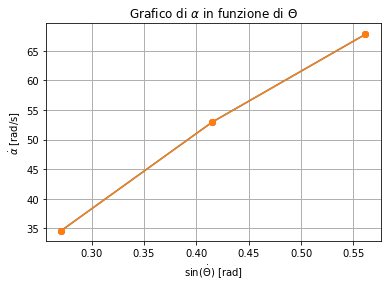

In [16]:
x = np.sin(x)
sx = np.cos(x)*sx

plt.plot(x,y)
plt.errorbar(x, y, xerr=sx,yerr=sy,ecolor='b', fmt='-o')
plt.plot(x,y,'ro')

plt.grid(linestyle='-', linewidth=1)

plt.xlabel("sin($\dot{\Theta}$) [rad]")
plt.ylabel(r"$\dot{\alpha}$ [rad/s]")
plt.title(r'Grafico di $\alpha$ in funzione di $\Theta$ ')

plt.show()

m         =  120.5574
sigma(m)  =  0.5865
c         =  2.2353
sigma(c)  =  0.2137
cov(m, c) =  -0.1215
rho(m, c) =  -0.9695


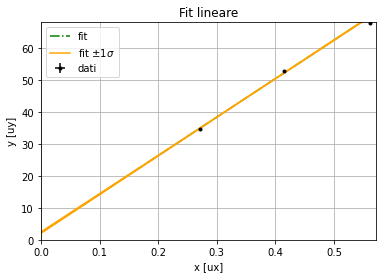

In [17]:
uy = sy
ux = sx
# fit a vs sin(theta)
m0, sm0, c0, sc0, cov0, rho0 = my.lin_fit(x, y, uy, "x [ux]", "y [uy]", 0, x.max()+0.01, 0, y.max()+0.3, plot=True, setrange=True)

m         =  120.2518
sigma(m)  =  0.6205
c         =  2.3596
sigma(c)  =  0.2296
cov(m, c) =  -0.1382
rho(m, c) =  -0.97


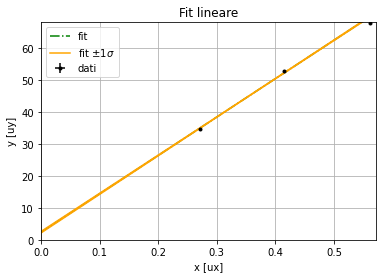

In [18]:
# nuove y
uy_new = np.sqrt(uy**2+(m0*ux)**2)
m, sm, c, sc, cov, rho = my.lin_fit(x, y, uy_new, "x [ux]", "y [uy]", 0, x.max()+0.01, 0, y.max()+0.3, plot=True, setrange=True)

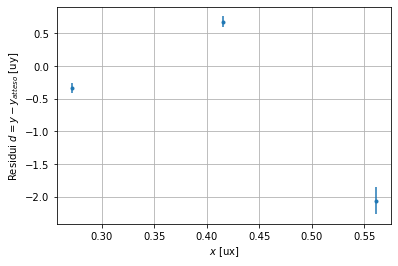

In [19]:
# studio dei residui
y_atteso = m*x + c
d = y - y_atteso
d_norm = d / uy_new

plt.errorbar(x,d,uy_new,marker='.',linestyle="")
plt.ylabel("Residui $d=y-y_{atteso}$ [uy]")
plt.xlabel("$x$ [ux]")
plt.grid()
plt.show()

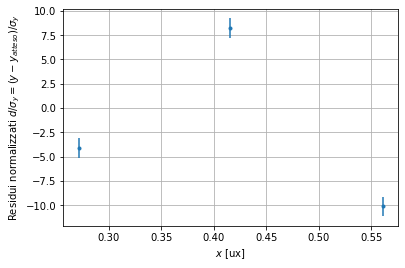

In [20]:
plt.errorbar(x,d_norm,uy_new/uy_new,marker='.',linestyle="")
plt.ylabel("Residui normalizzati $d/\sigma_y=(y-y_{atteso})/\sigma_y$")
plt.xlabel("$x$ [ux]")
plt.grid()
plt.show()

2.1981036703059416
m         =  114.261
sigma(m)  =  10.7209
c         =  4.2773
sigma(c)  =  4.6356
cov(m, c) =  -47.7988
rho(m, c) =  -0.9618


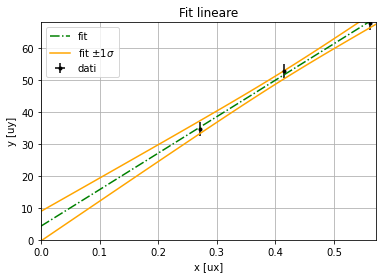

In [21]:
# Incertezze a posteriori
sigmy_post = math.sqrt( np.sum(d**2)/(d.size-2) )
uy_post = np.repeat(sigmy_post,y.size)
print (sigmy_post)

# Nuovo fit con incertezze a posteriori sulle y
m1, sm1, c1, sc1, cov1, rho1 = my.lin_fit(x, y, uy_post, "x [ux]", "y [uy]", 0, x.max()+0.01, 0, y.max()+0.3, plot=True, setrange=True)

# Calcolo della gravità
## Da punto 4 a 6


In [22]:
# telefono/sensore rettangolare
tel = {
    'I_cm': None,
    'sI_cm':None,
    'm' : 0.150,#kg
    'sm' : 0.025/np.sqrt(12),
    'l_a' : 0.08,#m
    'l_b' : 0.015,#m
    'sl' : 0.001/np.sqrt(12),
}

dev_m = (tel['l_a']**2+tel['l_b']**2)/12
dev_a = tel['l_a']*tel['m']/6
dev_b = tel['l_b']*tel['m']/6

tel['I_cm'] = (tel['m']*(tel['l_a']**2 + tel['l_b']**2))/12
tel['sI_cm'] = np.sqrt( (dev_m*tel['sm'])**2 + (dev_a*tel['sl'])**2 + (dev_b*tel['sl'])**2 )



# cilindro che rotola
rot = {
    'I_cm' : None,
    'sI_cm': None,
    'm' : 0.163,#kg
    'sm' : 0.025/np.sqrt(12),
    'r_ext' : 0.105/2,#m
    'r_int' : 0.08/2,#m
    'sr' : 0.001/np.sqrt(12),
}

dev_m = (rot['r_ext']**2+rot['r_int']**2)/2
dev_a = rot['r_ext']*rot['m']
dev_b = rot['r_int']*rot['m']

rot['I_cm'] = (rot['m']*(rot['r_ext']**2 + rot['r_int']**2))/2
rot['sI_cm'] = np.sqrt( (dev_m*rot['sm'])**2 + (dev_a*rot['sr'])**2 + (dev_b*rot['sr'])**2 )


#tot
Icm_tot = tel['I_cm'] + rot['I_cm']
sIcm_tot = np.sqrt(rot['sI_cm']**2+tel['sI_cm']**2)

rt.PrintResult("Icm: ", Icm_tot,sIcm_tot,5,"[kg*m^2]")

Icm: = 0.00044 ± 2e-05 [kg*m^2] [4.55%]


In [23]:
print(m)
print(sm)

120.25180500953674
0.6205143165402216


In [24]:
# gravità


R = rot['r_ext']
sR = rot['sr']
M = rot['m'] + tel['m']
sM = rot['sm']

dev_m = Icm_tot/(M*R) + R
dev_I = m/(M*R)
dev_M = (m*Icm_tot)/(R*M**2)
dev_R = (-m*Icm_tot)/(R*M**2) + m

g = m*(Icm_tot+M*R**2)/(M*R)
sg = np.sqrt( (dev_m*sm)**2 + (dev_I*sIcm_tot)**2 + (dev_M*sM)**2 + (dev_R*sR)**2 )


rt.PrintResult("Gravità: ",g,sg,4,"[N/kg]")

Gravità: = 9.5174 ± 0.1533 [N/kg] [1.61%]


In [25]:
s = (9.805-g) / sg
s

1.8765785229964975